In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the data
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [4]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [6]:
# Merge datasets
df = pd.merge(species, observations, how='outer')
df.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128


In [7]:
# Look for duplicates
df.duplicated(subset=['scientific_name', 'park_name']).sum()

3468

In [8]:
# Drop duplicates 
df.drop_duplicates(subset=['scientific_name', 'park_name'], inplace=True)

In [9]:
# Check again
df.duplicated(subset=['scientific_name', 'park_name']).sum()

0

In [10]:
# Unique conservation status
print(df['conservation_status'].unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


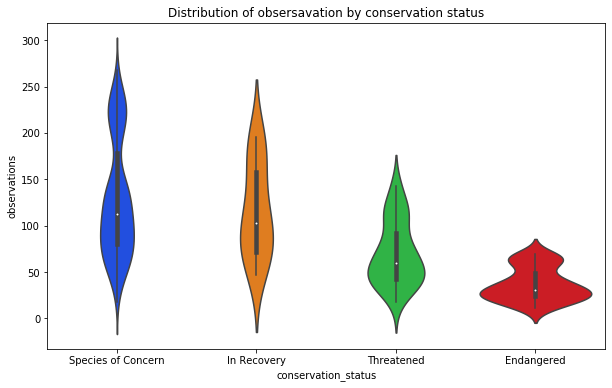

In [11]:
# Looking the distribution of obsersavation by conservation status
plt.figure(figsize=(10, 6))
order = ['Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
sns.violinplot(data=df, x='conservation_status', y='observations', order=order, palette='bright')
plt.title('Distribution of obsersavation by conservation status')
plt.show()

In [12]:
print(df['conservation_status'].value_counts())

Species of Concern    604
Endangered             60
Threatened             36
In Recovery            12
Name: conservation_status, dtype: int64


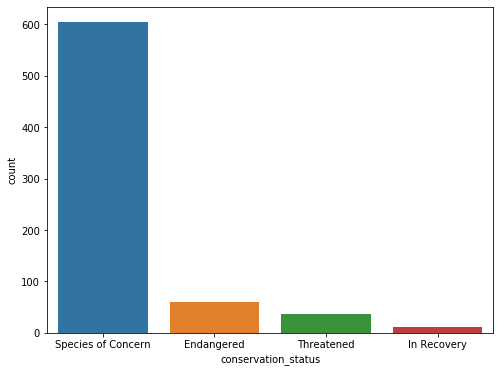

In [13]:
# Count conservation status 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='conservation_status')
plt.show()

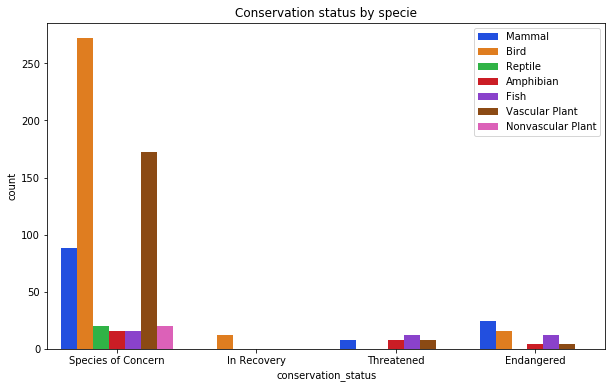

In [14]:
# species more likely to be endangered
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='conservation_status', hue='category', order=order, palette='bright')
plt.title('Conservation status by specie')
plt.legend(loc='upper right')
plt.show()

In [15]:
# In the species of concern status, birds represent a very high percentage folowed by vascular plant and mammals. 
# Mammals are the most endangered specie followed by birds.

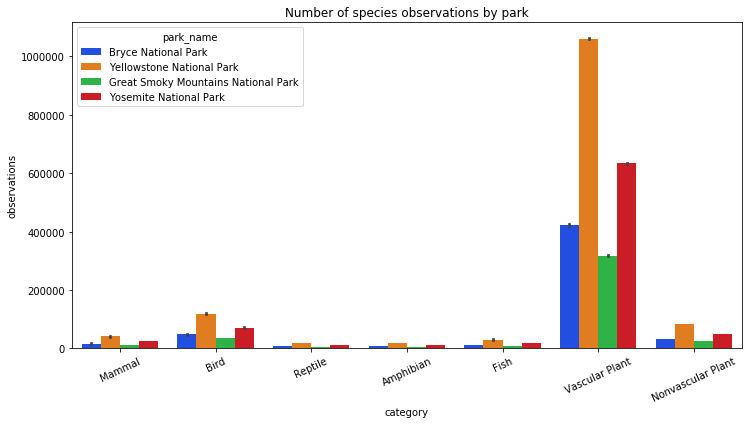

In [16]:
# The most spotted species in each park
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='category', y='observations', hue='park_name', estimator=np.sum, palette='bright')
plt.xticks(rotation=25)
plt.title('Number of species observations by park')
plt.show()

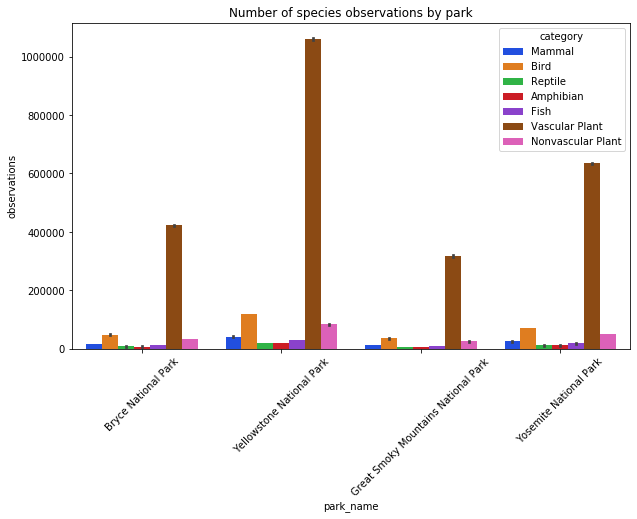

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='park_name', y='observations', hue='category', estimator=np.sum, palette='bright')
plt.xticks(rotation=45)
plt.title('Number of species observations by park')
plt.show()